# HR Analytics Project- Understanding the Attrition in HR 

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import zscore 

import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

from imblearn.over_sampling import SMOTE

import warnings 
warnings.filterwarnings('ignore')

import joblib 

In [2]:
## Loading the Dataset now. 
df = pd.read_csv("untitled10.txt")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Observation from the datasets loaded: We have in  total 1470 rows and 35 columns. Among which, Attrition is our target variable or dependent varaibles, rest of the variables are independent and are a part of the HR Analytics. 

# Understanding and Describing the Dataset - 

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We do have certain varaibles including  Attrition,  BusinessTravel, Department, EducationField, Gender, Jobrole, Marital Status, over18, overtime in object data type. All of them needs to be converted into either integer or float format. 

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null vlaues in the dataset, good to go!

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Obervations: 
    
    1. We do have 1470 rows for each respective variable. 
    2. Standard deviation of certain variable is quite high, which means outliers do exsist in the dataset. 
    3. As per 50% and maximum values, data is not balanced, it is skewed. 

Here we can drop certain varaiables like employee count, employee number, over18, and standard hours since these variables do not have sugnificance to our target varaibles. Removing them, it will not make much of the difference in the training of the model further. 

    1. EmployeeCount refers to the data use to fill is same that is 1. so there would be no mean to have them in dataset.
    2. EmployerNumber is just a unique number given to employer that doesnot effect our target data. 
    3. Over18 is just a Labour law in india that below 18 you just cant get employed. 
    4. StandardHours refers to giving only single value for all our columns. 

In [8]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [9]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


# EDA & Data Visualization

Total Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

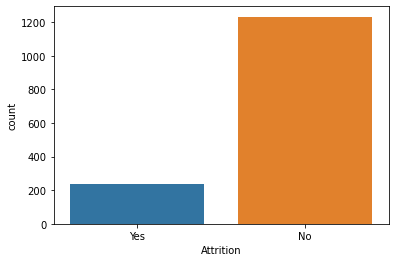

In [10]:
print("Total Attrition")
print(df['Attrition'].value_counts())
sns.countplot(df['Attrition'])

Observation: The data among the attrition is unbalanced on the massive scale. 

Total count values of BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

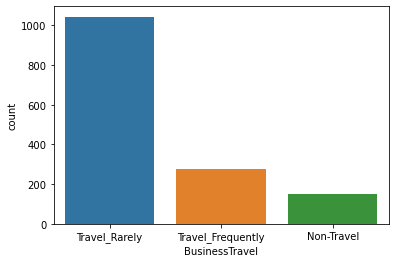

In [11]:
print("Total count values of BusinessTravel")
print(df['BusinessTravel'].value_counts())
sns.countplot(df['BusinessTravel'])

In total, there are three business travel class - Travel Rarely, travel frequently, non-travel. The majority of employees comes into the class of travel rarely. 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<AxesSubplot:xlabel='Department', ylabel='count'>

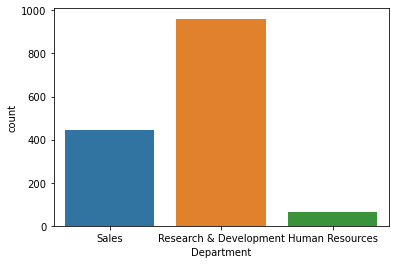

In [12]:
print(df['Department'].value_counts())
sns.countplot(df['Department'])

There are three departments - sales, research & development, and human resources. Majority of the employees are there in research and development. 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


<AxesSubplot:xlabel='EducationField', ylabel='count'>

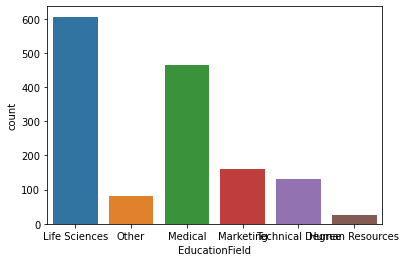

In [13]:
print(df['EducationField'].value_counts())
sns.countplot(df['EducationField'])

There are six different education field classes available - life science, medical, marketing, technical, HR, and others. Majority of employees are from the education major "Life Science".

Male      882
Female    588
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

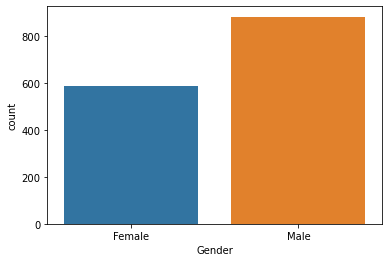

In [14]:
print(df['Gender'].value_counts())
sns.countplot(df['Gender'])

Now these categorical varaibles are in the object format, we will change it in numeric format. 

In [15]:
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])

All the categorical varaibles are converted into the numeric data type format which makes data quite easy to train for the model. 

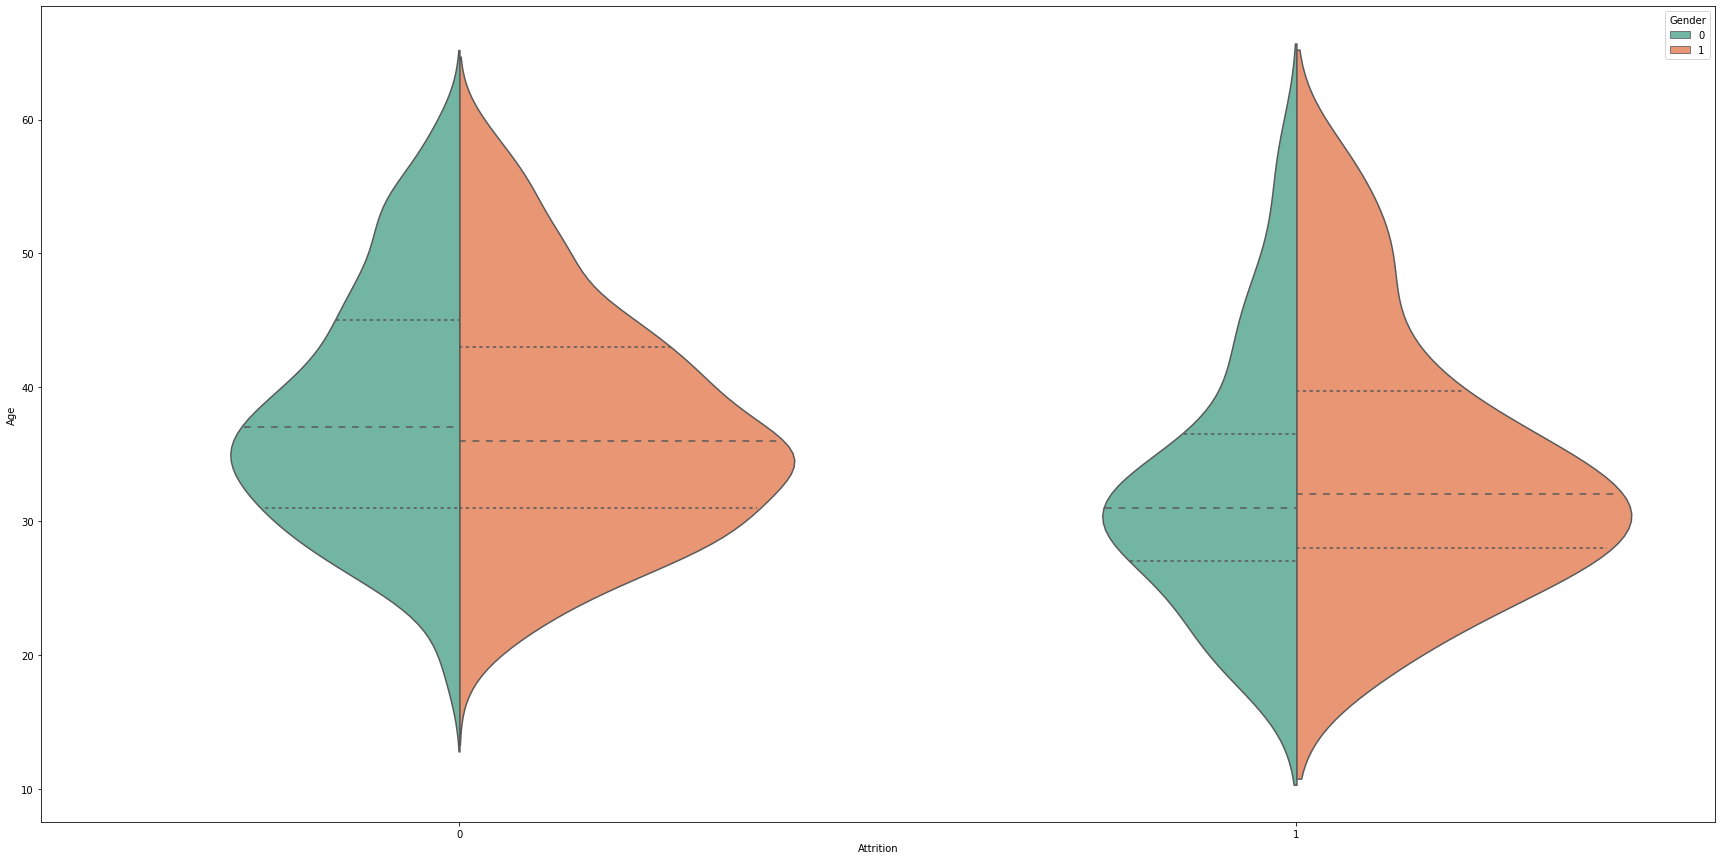

In [16]:
plt.figure(figsize=(30,15))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Observation: Majority of the attirtion is in range from 20 to 40 age group. It is equivelent in terms of both males and females. 

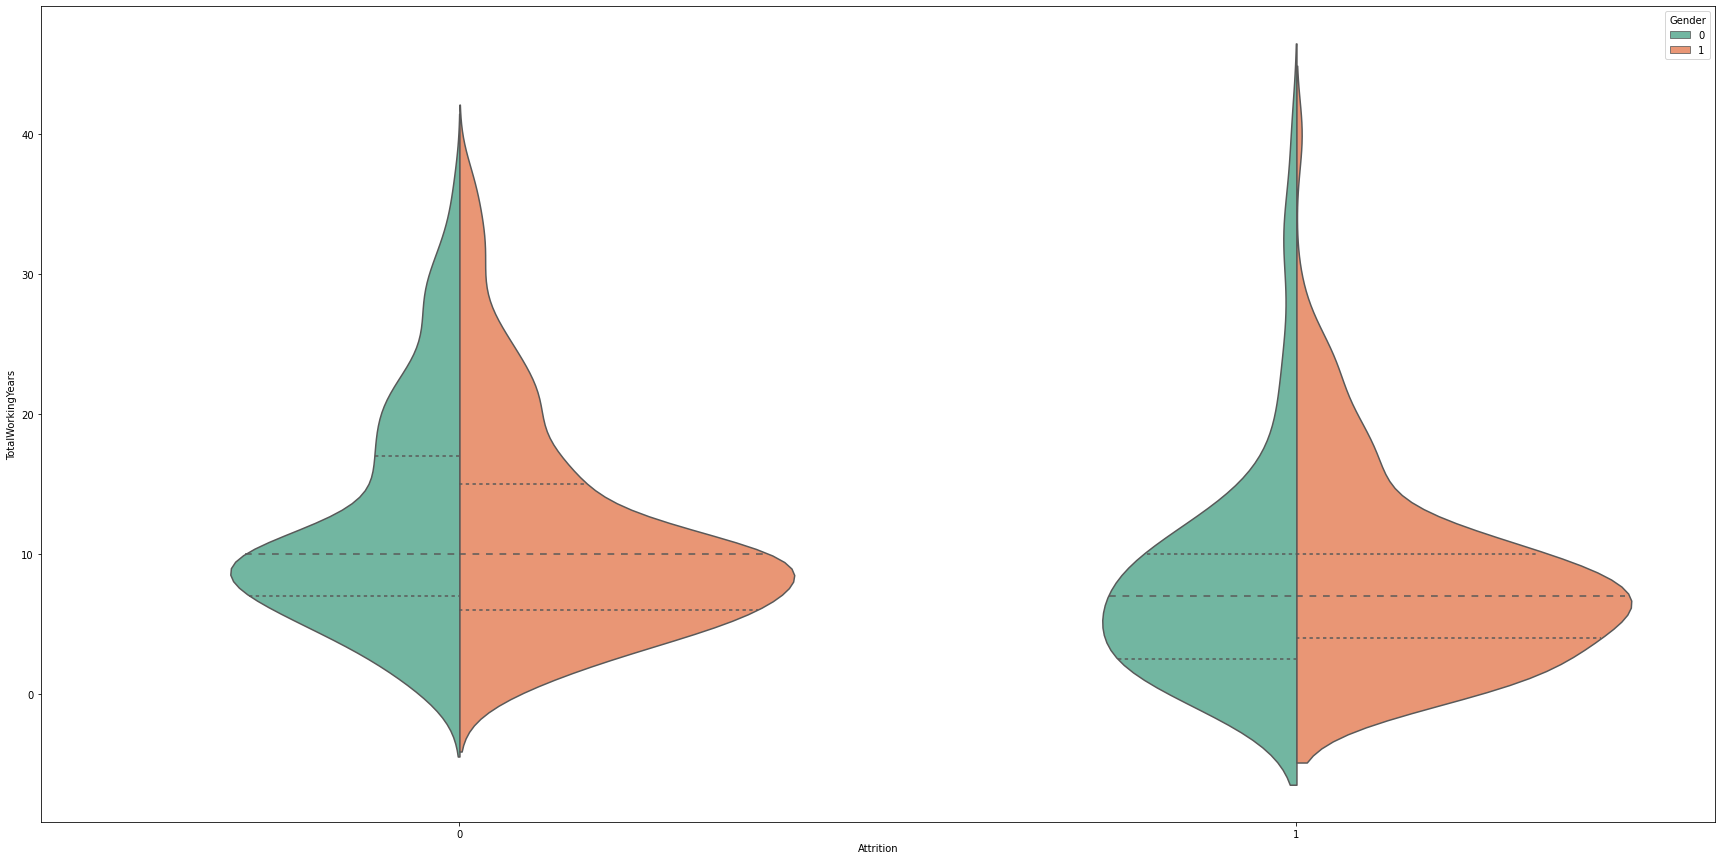

In [17]:
plt.figure(figsize=(30,15))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Maximum attrition happened among the employees whose total working hours are ranging from 0 to 10. 

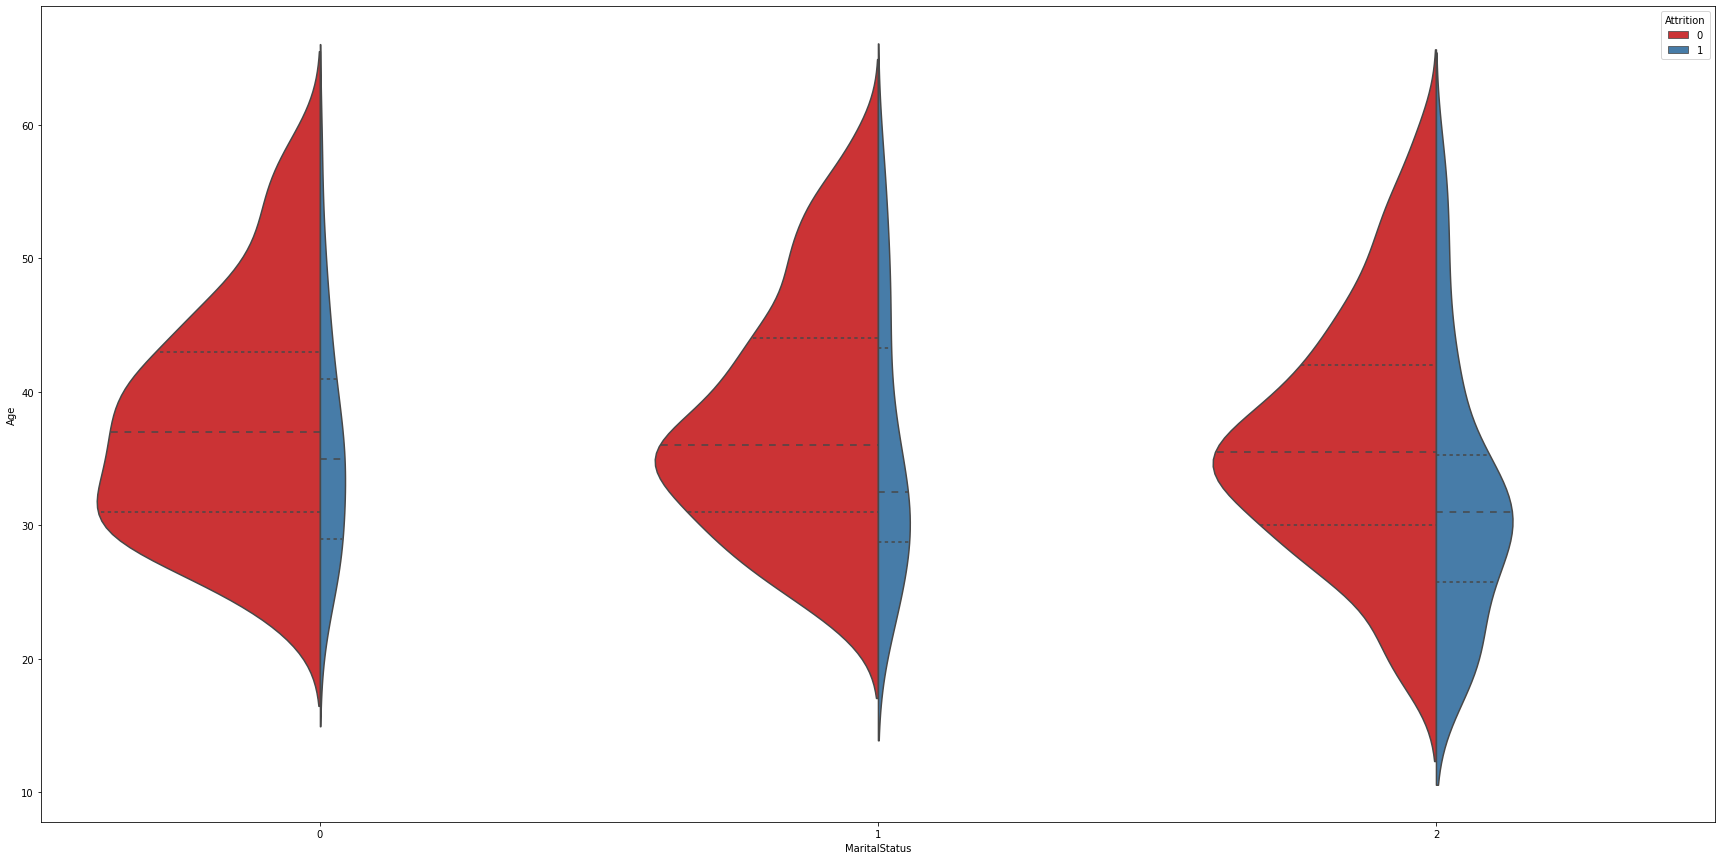

In [18]:
plt.figure(figsize=(30,15))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

The maxium number of attrition is done by the employees who are single in comparison to the ones who are married and divorced too.

In [19]:
## Correlation with heatmap 
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

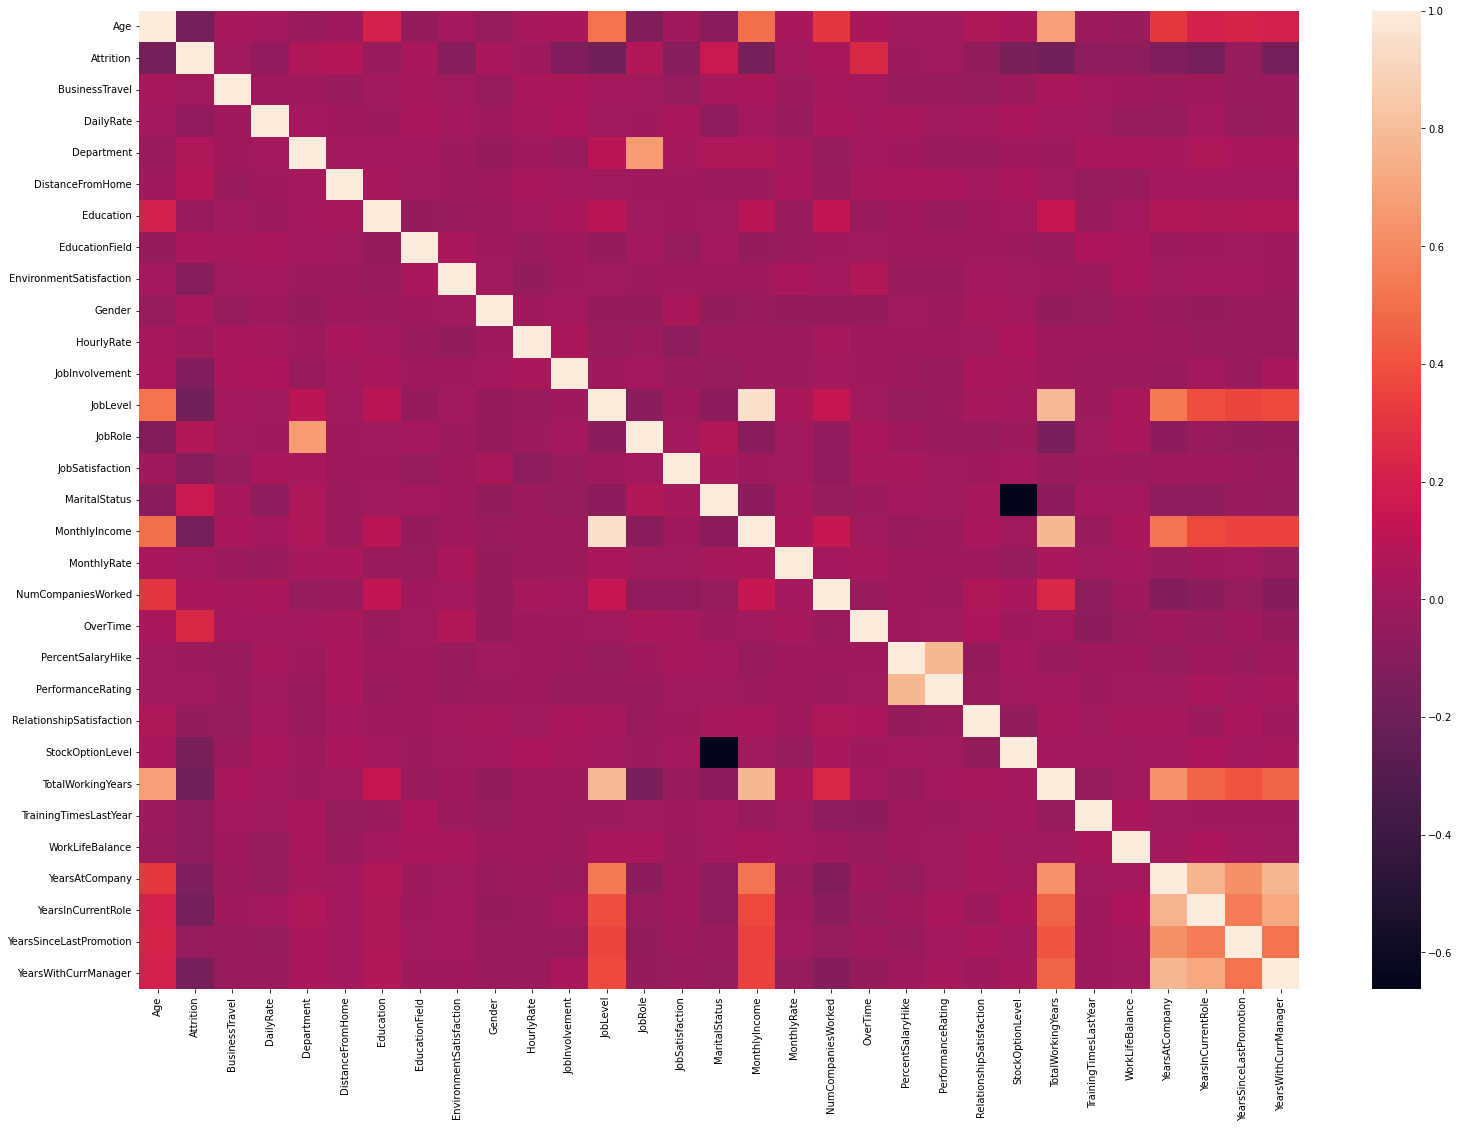

In [20]:
plt.figure(figsize=(26,18))
sns.heatmap(df.corr())

Observations: 
    
    1. "Attrition" has both positive and negative correlations with the independent columns. 
    2. Among all the feature varaibles, Attrition is quite strongly correlated with Total working hours.
    3. There is very less or negligible amount of the multi colinearity.

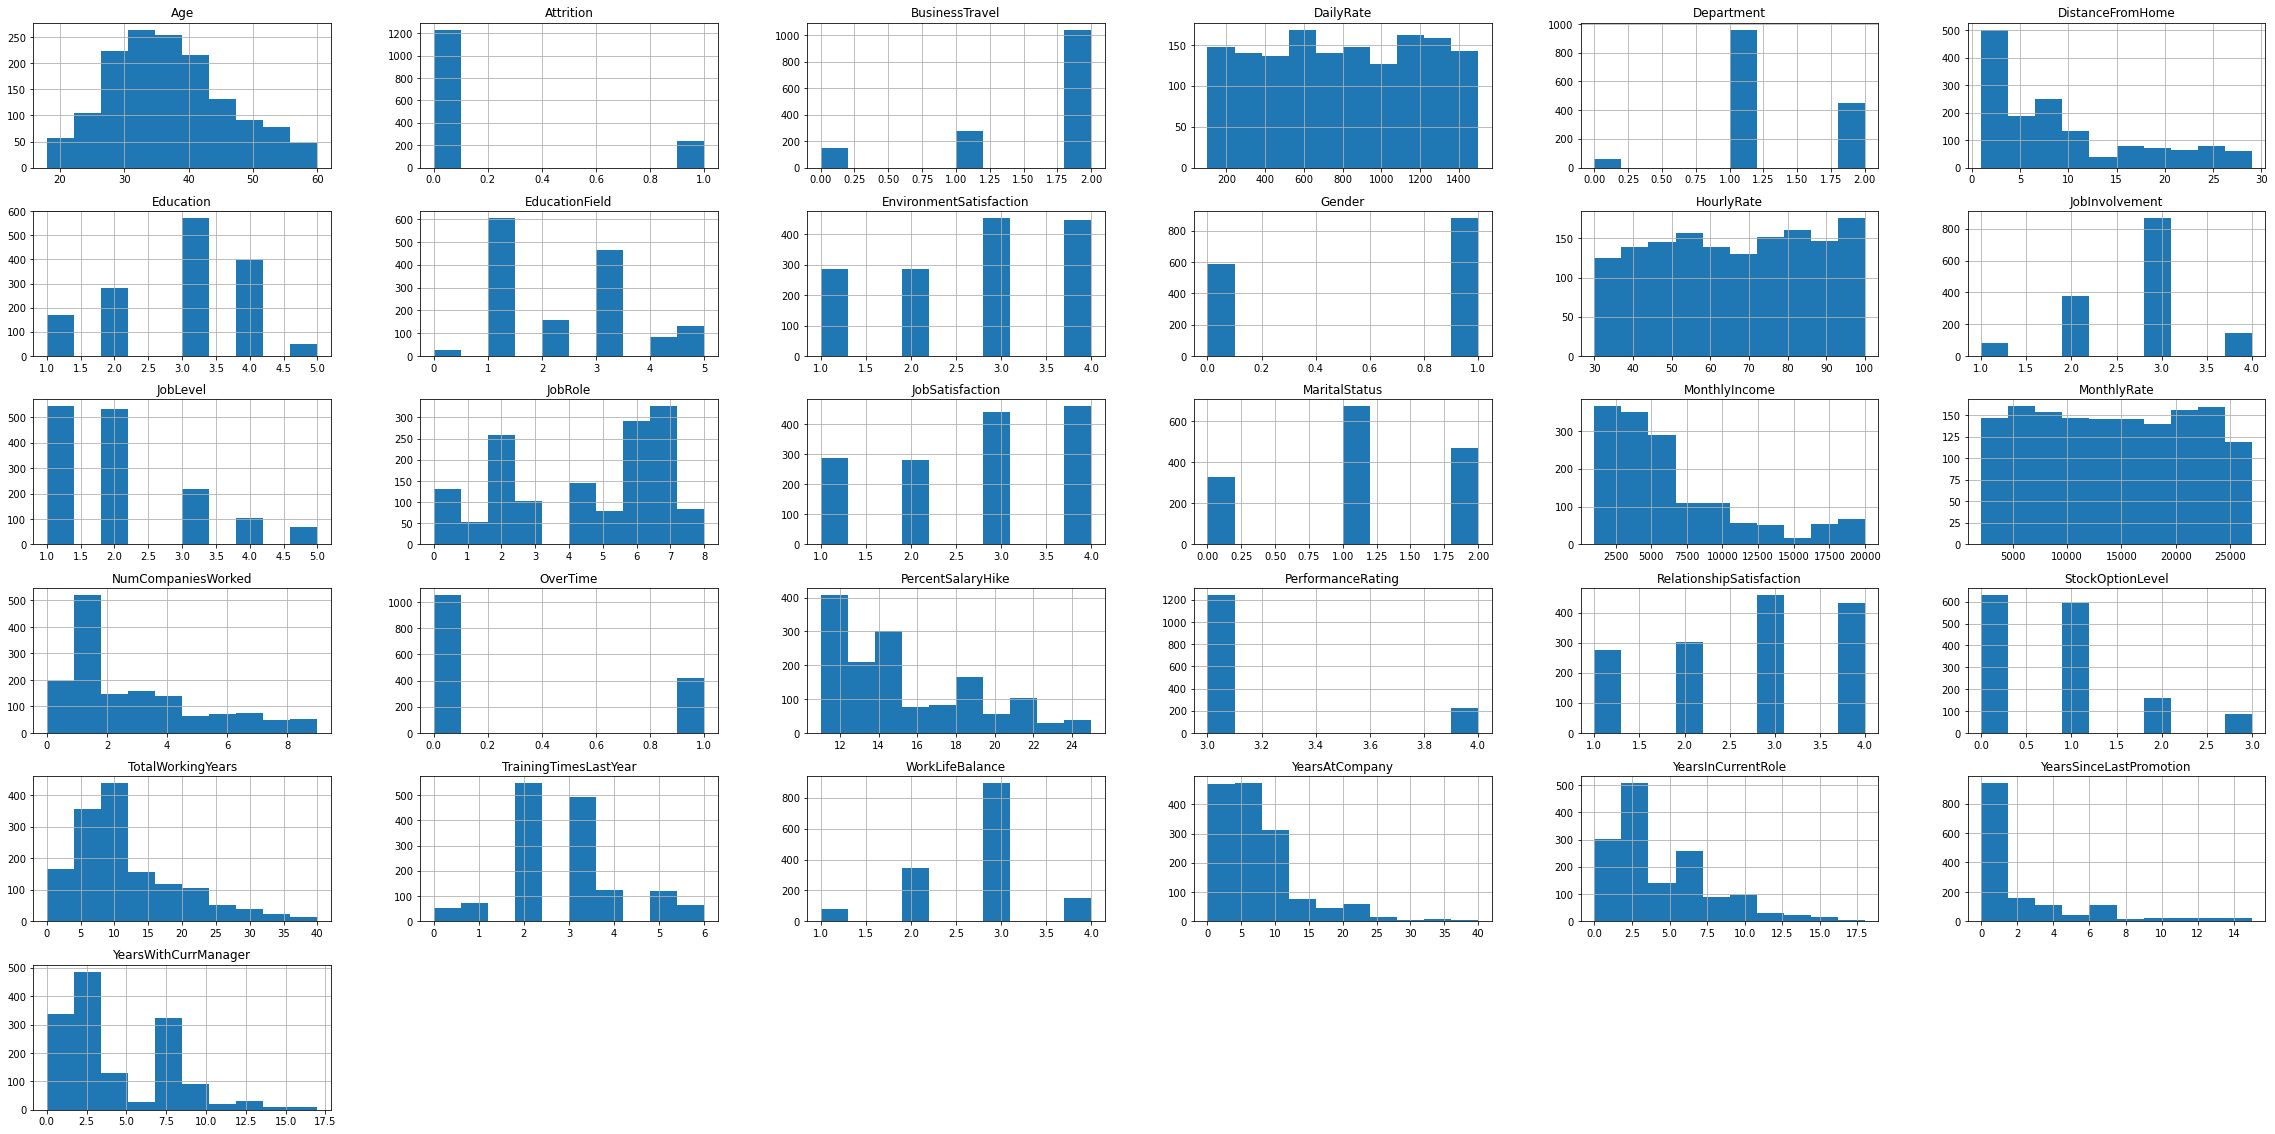

In [21]:
## Checking out the distribution with respect to each feature variables. 
df.hist(figsize=(40,20))
plt.show()

Observation: 
    
    Data is not normally distributed, certain outliers and skewness is there.
    Since it is quite visible that certain variables are skewed to right or left, there is a certain siginificant amount of skewness that exsist in the dataset. 

In [22]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

<AxesSubplot:ylabel='Density'>

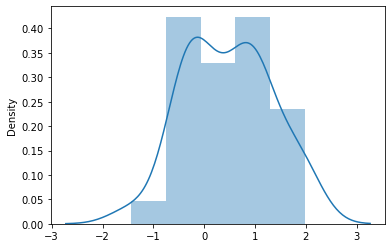

In [23]:
sns.distplot(df.skew())

<AxesSubplot:ylabel='Density'>

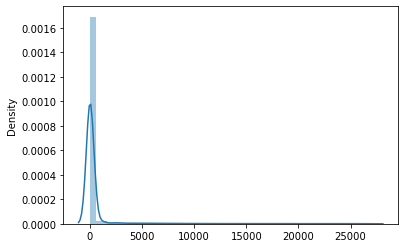

In [24]:
sns.distplot(df)

# Data Preprocessing 

In [25]:
### Removing the outliers. 
z = np.abs(zscore(df))
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [26]:
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(1387, 31)

In [27]:
df.shape

(1470, 31)

In [28]:
df = df_new

In [29]:
from sklearn.preprocessing import power_transform
df[['BusinessTravel','DistanceFromHome','PercentSalaryHike','PerformanceRating','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']]=power_transform(df[['BusinessTravel','DistanceFromHome','PercentSalaryHike','PerformanceRating','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']],method='yeo-johnson')

All skewness and outliers are removed from the target and feature varaibles. 

# Splitting the Dataset in X and Y now - 

In [30]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

# Performing SMOTE technique to balance the data - 

In [31]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

# Standard Scaling - 

In [32]:
##  Standard scaling the X varaibles. 
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.704654,0.724483,0.832842,1.552300,-1.686183,-0.725374,-0.913514,-0.448725,-1.051406,1.478571,...,-0.478997,-1.459057,-0.733899,0.012960,-2.122954,-2.189799,0.410871,0.461148,-0.691481,0.762474
1,1.630337,-1.434299,-1.347330,-0.357969,0.167468,-1.746630,-0.913514,0.480834,0.951107,-0.270802,...,2.454387,1.431598,0.530766,0.337857,0.323602,0.312487,1.146160,1.216102,-0.257361,1.214746
2,0.241813,0.724483,1.550735,-0.357969,-1.192879,-0.725374,1.473510,1.410393,0.951107,1.372548,...,-0.478997,-0.495505,-0.733899,-0.167206,0.323602,0.312487,-2.039736,-1.502368,-0.691481,-1.427418
3,-0.221029,-1.434299,1.601067,-0.357969,-0.840029,1.317138,-0.913514,1.410393,-1.051406,-0.535858,...,-0.478997,0.468046,-0.733899,0.012960,0.323602,0.312487,0.810689,1.216102,0.610880,-1.427418
4,-0.915291,0.724483,-0.520825,-0.357969,-1.192879,-1.746630,0.677835,-1.378284,0.951107,-1.384039,...,-0.478997,1.431598,0.530766,-0.362531,0.323602,0.312487,-0.785550,-0.257159,0.176760,-0.202513


# Making the training and testing datasets - 

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=526)

# Machine Learning Model with Classification - 

In [34]:
# Making An Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=526)
    
    model.fit(X_train, Y_train)
    
    pred = model.predict(X_test)
    
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)

    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [35]:
model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 80.82901554404145

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81       295
           1       0.79      0.84      0.81       284

    accuracy                           0.81       579
   macro avg       0.81      0.81      0.81       579
weighted avg       0.81      0.81      0.81       579

Cross Validation Score: 79.75459894242942

Accuracy Score - Cross Validation Score is 1.074416601612029


In [36]:
from sklearn.svm import SVC
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 88.08290155440415

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       295
           1       0.87      0.89      0.88       284

    accuracy                           0.88       579
   macro avg       0.88      0.88      0.88       579
weighted avg       0.88      0.88      0.88       579

Cross Validation Score: 87.6601251210248

Accuracy Score - Cross Validation Score is 0.42277643337934023


In [37]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 84.6286701208981

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       295
           1       0.81      0.90      0.85       284

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579

Cross Validation Score: 80.01601251210249

Accuracy Score - Cross Validation Score is 4.612657608795601


In [38]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 91.53713298791018

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       295
           1       0.91      0.92      0.91       284

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579

Cross Validation Score: 90.55354881954271

Accuracy Score - Cross Validation Score is 0.9835841683674715


In [39]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 74.26597582037996

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.51      0.67       295
           1       0.66      0.99      0.79       284

    accuracy                           0.74       579
   macro avg       0.82      0.75      0.73       579
weighted avg       0.82      0.74      0.73       579

Cross Validation Score: 76.81527891561778

Accuracy Score - Cross Validation Score is -2.5493030952378177


The highest accuracy score is given by RandomForestClassifier model, that is, 94%.

# Hyper Parameter Tuning - 

Choosing RandomForestClassifier

In [45]:
from sklearn.model_selection import RandomizedSearchCV
bootstrap = [True, False]
random_grid = {'n_estimators': [20,40,60,80,100],
               'criterion':['gini','entropy'],
               'max_features': ['auto','sqrt','log2'],
               'min_samples_split': [2,5,10],
              'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100]},
                   random_state=42, verbose=2)

Hyper Parameter Tuning is successfully done on the RandomForestmodel and received the accuracy score for it.

# Making an AUC ROC curve now - 

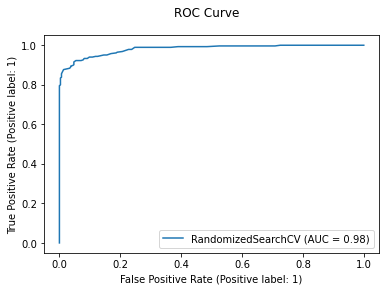

In [46]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
disp = metrics.plot_roc_curve(rf_random, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

Note: RandomForestClassifier is the final model and best as of now with the accuracy score 98% and cross validation value 90% along with AUC score 0.98. 

In [49]:
filename = "FinalModel"
joblib.dump(rf_random, filename)

['FinalModel']

The End! 